In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv("Chihuahua_clima.csv", index_col=0)
df["Theta"] = pd.to_numeric(df["Theta"], errors="coerce")
df.head()

Timestamp  Year  Mes  Dia  HR (%)  Rs (W/m²)  T Aire (C)  \
0  2020-04-01 13:00:00  2020    4    1      22        4.0        15.8   
1  2020-04-01 13:10:00  2020    4    1      23       17.0        15.8   
2  2020-04-01 13:20:00  2020    4    1      23       34.0        16.6   
3  2020-04-01 13:30:00  2020    4    1      26       47.0        17.0   
4  2020-04-01 13:40:00  2020    4    1      27       49.0        17.1   

    Td form      Theta  
0 -5.337960  89.396630  
1 -4.812238  87.208510  
2 -4.187424  85.017212  
3 -2.415345  82.823682  
4 -1.884415  80.628862

In [3]:
df["Timestamp"] = pd.to_datetime(df['Timestamp'], errors='coerce')
df

Timestamp  Year  Mes  Dia  HR (%)  Rs (W/m²)  T Aire (C)  \
0     2020-04-01 13:00:00  2020    4    1      22        4.0        15.8   
1     2020-04-01 13:10:00  2020    4    1      23       17.0        15.8   
2     2020-04-01 13:20:00  2020    4    1      23       34.0        16.6   
3     2020-04-01 13:30:00  2020    4    1      26       47.0        17.0   
4     2020-04-01 13:40:00  2020    4    1      27       49.0        17.1   
...                   ...   ...  ...  ...     ...        ...         ...   
22571 2021-04-01 00:20:00  2021    4    1      10      202.0        25.2   
22572 2021-04-01 00:30:00  2021    4    1      11      165.0        24.6   
22573 2021-04-01 00:40:00  2021    4    1      11      128.0        24.1   
22574 2021-04-01 01:00:00  2021    4    1      13       41.0        22.7   
22575 2021-04-01 01:10:00  2021    4    1      14       21.0        22.1   

        Td form      Theta  
0     -5.337960  89.396630  
1     -4.812238  87.208510  
2     -4.187424  85.017212  
3     -2.415345  82.823682  
4     -1.884415  80.628862  
...         ...        ...  
22571 -7.380279  77.286479  
22572 -6.747384  79.478675  
22573 -7.096539  81.671314  
22574 -6.226008  86.054061  
22575 -5.821364  88.242259  

[22576 rows x 9 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22576 entries, 0 to 22575
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Timestamp   22576 non-null  datetime64[ns]
 1   Year        22576 non-null  int64         
 2   Mes         22576 non-null  int64         
 3   Dia         22576 non-null  int64         
 4   HR (%)      22576 non-null  int64         
 5   Rs (W/m²)   22576 non-null  float64       
 6   T Aire (C)  22576 non-null  float64       
 7   Td form     22576 non-null  float64       
 8   Theta       22576 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 1.7 MB


In [5]:
df.loc[:, "HR (%)":].describe()

HR (%)     Rs (W/m²)    T Aire (C)       Td form         Theta
count  22576.000000  22576.000000  22576.000000  22576.000000  22576.000000
mean      23.985781    514.866097     25.392581      0.396829     53.318823
std       15.809590    328.158379      8.219743      7.118179     21.477042
min        2.000000      1.000000     -4.600000    -26.164129      5.309632
25%       13.000000    218.000000     20.400000     -4.376824     37.531254
50%       20.000000    522.500000     26.800000      0.363266     53.988580
75%       30.000000    786.000000     31.800000      5.781513     70.888527
max      100.000000   1367.000000     40.300000     16.065914     89.909566

<Axes: >

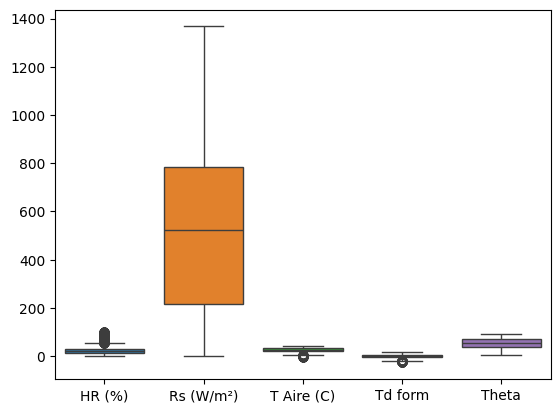

In [6]:
sns.boxplot(df.loc[:, "HR (%)":])

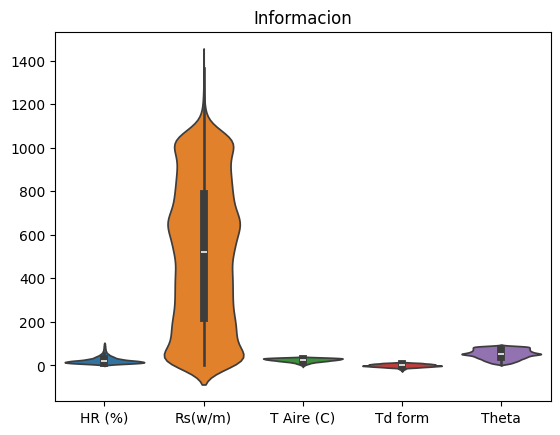

In [7]:
plt.title("Informacion")
df = df.rename(columns={"Rs (W/m²)": "Rs(w/m)"})
sns.violinplot(df.loc[:, "HR (%)":"Theta"], );

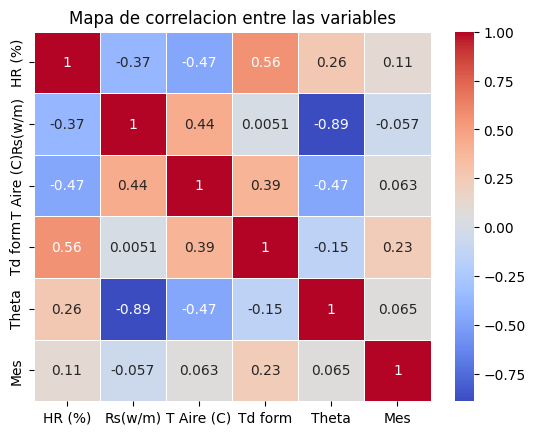

In [8]:
cols = list(df.loc[:, "HR (%)":].columns)
cols = cols + ["Mes"]


corr_mat = df.loc[:, cols].corr()

sns.heatmap(corr_mat, annot=True, cmap="coolwarm", linewidth=0.5)
plt.title("Mapa de correlacion entre las variables")
plt.show()

<Axes: >

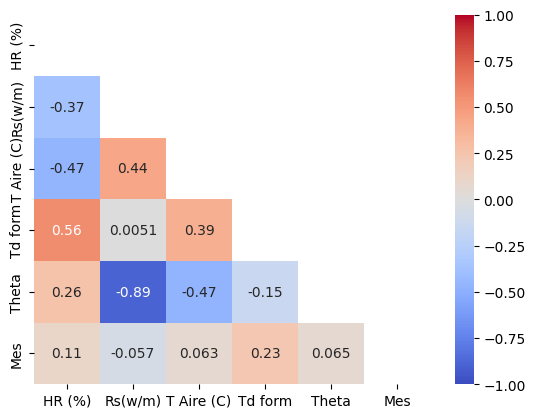

In [9]:
# Triangular
import numpy as np

# Mascara para el triangulo superior
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Generamos una paleta de color divergente
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Creamos el heatmap (mapa de correlación)
sns.heatmap(corr_mat, mask=mask, cmap='coolwarm', annot=True, vmax=1, vmin=-1, center=0)

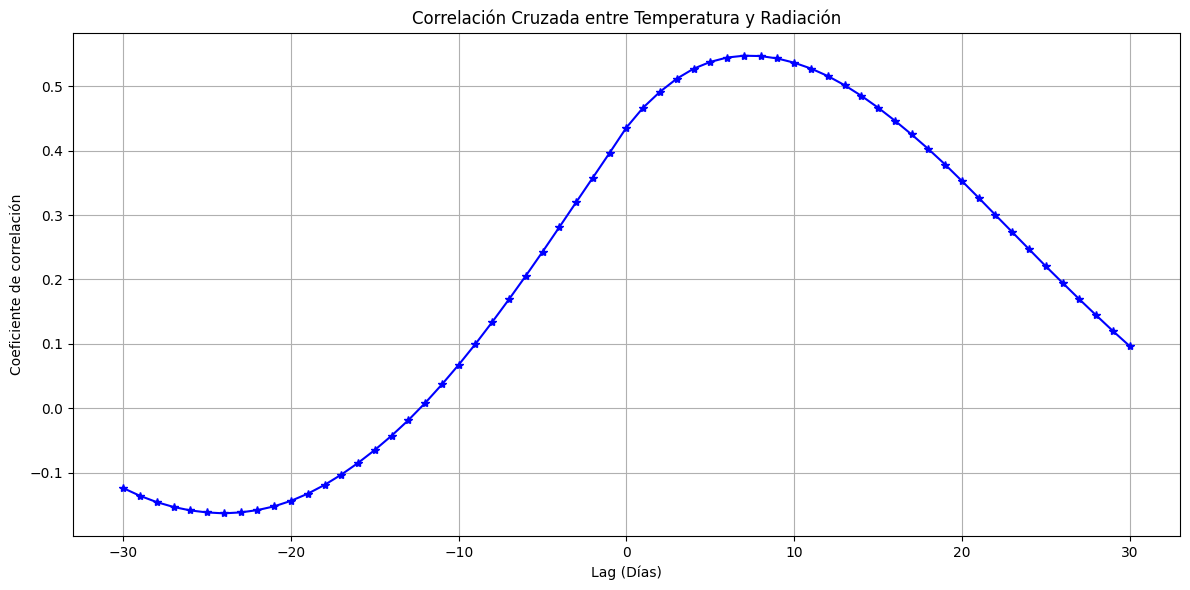

In [10]:
# Veamos como la radiación afecta en los posteriores y anteriores 30 días
lags = np.arange(-30, 31) 
cross_corr = [df["T Aire (C)"].corr(df["Rs(w/m)"].shift(lag)) for lag in lags]

# lista = []
# for lag in lags:
#     lista.append(
#         df["T Aire (C)"].corr(df["Rs(w/m)"].shift(lag))
#     )

plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr, marker="*", color="b")
plt.title("Correlación Cruzada entre Temperatura y Radiación")
plt.xlabel("Lag (Días)")
plt.ylabel("Coeficiente de correlación")
plt.grid(True)
plt.tight_layout()
plt.show()

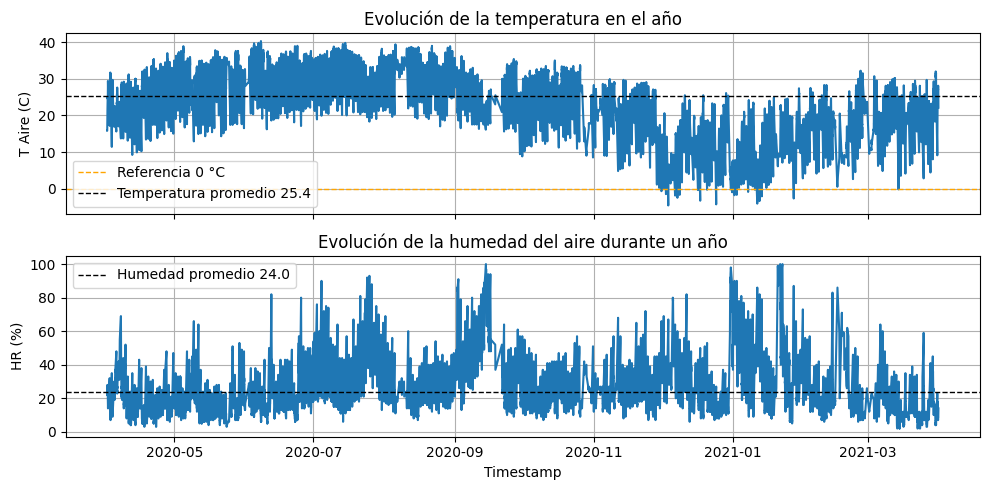

In [11]:
# Veamos la evolución de temperatura al año y humedad
fig, ax = plt.subplots(2, 1, figsize=(10, 5), sharex=True) # Comparten el eje x, solo se mostrará una vez

ax[0].set_title("Evolución de la temperatura en el año")
sns.lineplot(df, x="Timestamp", y="T Aire (C)", ax=ax[0]) 
# Línea en 0 para referencia
ax[0].axhline(0, color='orange', linestyle='--', linewidth=1, label='Referencia 0 °C')
ax[0].axhline(df["T Aire (C)"].mean(), color="black", linestyle="--", linewidth=1, label=f"Temperatura promedio {df['T Aire (C)'].mean():.1f}")
ax[0].legend()
ax[0].grid(True)

# Grafica inferior
ax[1].set_title("Evolución de la humedad del aire durante un año")
sns.lineplot(df, x="Timestamp", y="HR (%)", ax=ax[1])
ax[1].axhline(df["HR (%)"].mean(), color="black", linestyle="--", linewidth=1, label=f"Humedad promedio {df['HR (%)'].mean():.1f}")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()

In [12]:
df["Semana"] = df["Timestamp"].dt.to_period("W")
# Agrupamos los datos por semana y utilizamos un método de agregación
# 
df_semanal = df.groupby("Semana").agg({'T Aire (C)': 'mean', 'HR (%)': 'mean'})
df_semanal.index = df_semanal.index.to_timestamp()
print(df_semanal.shape)
df_semanal.head()

(53, 2)


T Aire (C)     HR (%)
Semana                           
2020-03-30   23.284637  21.846369
2020-04-06   23.208451  23.132797
2020-04-13   24.781404  13.823529
2020-04-20   27.871963  13.740187
2020-04-27   30.366484  16.071429

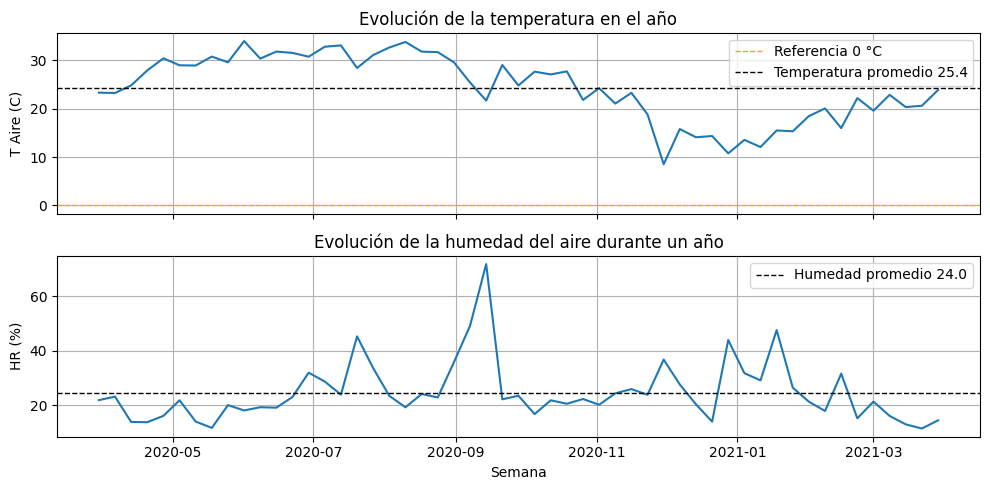

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5), sharex=True) # Comparten el eje x, solo se mostrará una vez

ax[0].set_title("Evolución de la temperatura en el año")
sns.lineplot(df_semanal, x="Semana", y="T Aire (C)", ax=ax[0]) 
# Línea en 0 para referencia
ax[0].axhline(0, color='orange', linestyle='--', linewidth=1, label='Referencia 0 °C')
ax[0].axhline(df_semanal["T Aire (C)"].mean(), color="black", linestyle="--", linewidth=1, label=f"Temperatura promedio {df['T Aire (C)'].mean():.1f}")
ax[0].legend()
ax[0].grid(True)

# Grafica inferior
ax[1].set_title("Evolución de la humedad del aire durante un año")
sns.lineplot(df_semanal, x="Semana", y="HR (%)", ax=ax[1])
ax[1].axhline(df_semanal["HR (%)"].mean(), color="black", linestyle="--", linewidth=1, label=f"Humedad promedio {df['HR (%)'].mean():.1f}")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()

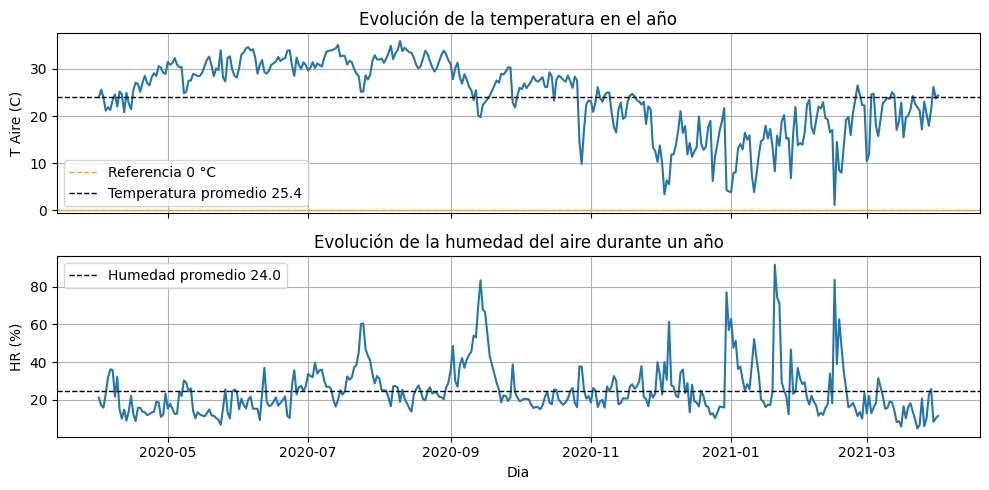

In [14]:
df["Dia"] = df["Timestamp"].dt.to_period("D")
# Agrupamos los datos por semana y utilizamos un método de agregación
# 
df_dia = df.groupby("Dia").agg({'T Aire (C)': 'mean', 'HR (%)': 'mean'})
df_dia.index = df_dia.index.to_timestamp()

fig, ax = plt.subplots(2, 1, figsize=(10, 5), sharex=True) # Comparten el eje x, solo se mostrará una vez

ax[0].set_title("Evolución de la temperatura en el año")
sns.lineplot(df_dia, x="Dia", y="T Aire (C)", ax=ax[0]) 
# Línea en 0 para referencia
ax[0].axhline(0, color='orange', linestyle='--', linewidth=1, label='Referencia 0 °C')
ax[0].axhline(df_dia["T Aire (C)"].mean(), color="black", linestyle="--", linewidth=1, label=f"Temperatura promedio {df['T Aire (C)'].mean():.1f}")
ax[0].legend()
ax[0].grid(True)

# Grafica inferior
ax[1].set_title("Evolución de la humedad del aire durante un año")
sns.lineplot(df_dia, x="Dia", y="HR (%)", ax=ax[1])
ax[1].axhline(df_dia["HR (%)"].mean(), color="black", linestyle="--", linewidth=1, label=f"Humedad promedio {df['HR (%)'].mean():.1f}")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()

In [15]:
df["Dia"] = df["Timestamp"].dt.to_period("W")

# Agrupamos los datos y ahora obtenemos el promedio, minimo y máximo de Temp y Humedad
df_dia = df.groupby("Dia").agg({'T Aire (C)': ['mean', "max", "min"], 'HR (%)': ['mean', "max", "min"]})
df_dia.index = df_dia.index.to_timestamp()

df_dia.columns = ["Temp Mean", "Temp Max", "Temp Min", "Humid Mean", "Humid Min", "Humid Max"]
df_dia.head(2)

Temp Mean  Temp Max  Temp Min  Humid Mean  Humid Min  Humid Max
Dia                                                                        
2020-03-30  23.284637      31.7      11.4   21.846369         48          7
2020-04-06  23.208451      31.2       9.2   23.132797         69          4

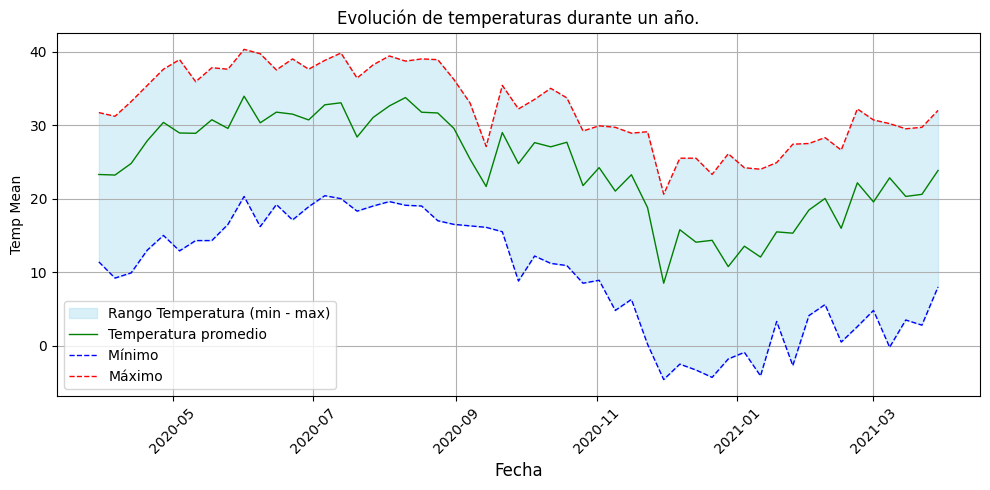

In [16]:
# Graficaremos estos datos juntos
plt.figure(figsize=(10, 5))

# Graficamos los datos
plt.fill_between(df_dia.index, df_dia["Temp Min"], df_dia['Temp Max'], color='skyblue', alpha=0.3, label='Rango Temperatura (min - max)')

sns.lineplot(df_dia, x="Dia", y="Temp Mean", color="green", linewidth=1, label="Temperatura promedio")
sns.lineplot(df_dia, x="Dia", y="Temp Min", color="blue", linewidth=1, linestyle="--", label="Mínimo ")
sns.lineplot(df_dia, x="Dia", y="Temp Max", color="red", linewidth=1, linestyle="--", label="Máximo")

plt.title("Evolución de temperaturas durante un año.")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Fecha', fontsize=12)
plt.tight_layout()

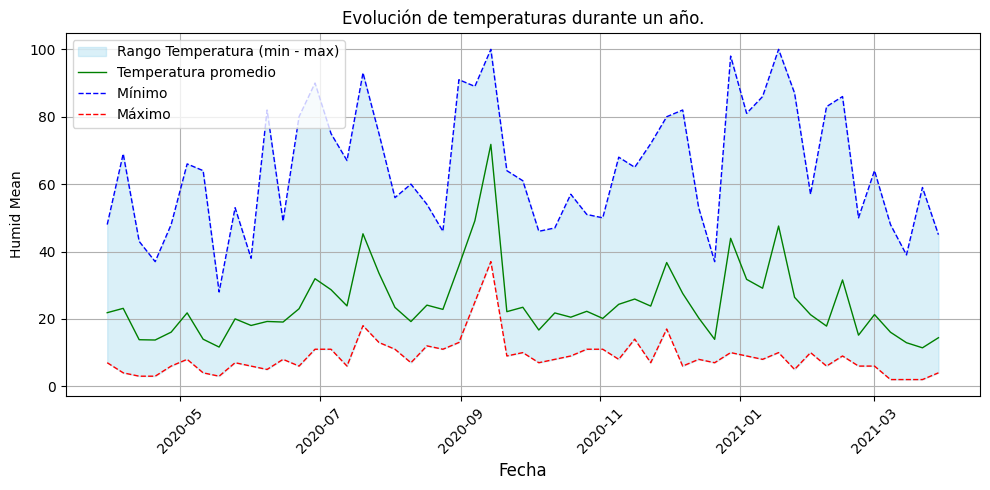

In [17]:
# Graficaremos estos datos juntos
plt.figure(figsize=(10, 5))

# Graficamos los datos
plt.fill_between(df_dia.index, df_dia["Humid Min"], df_dia['Humid Max'], color='skyblue', alpha=0.3, label='Rango Temperatura (min - max)')

sns.lineplot(df_dia, x="Dia", y="Humid Mean", color="green", linewidth=1, label="Temperatura promedio")
sns.lineplot(df_dia, x="Dia", y="Humid Min", color="blue", linewidth=1, linestyle="--", label="Mínimo ")
sns.lineplot(df_dia, x="Dia", y="Humid Max", color="red", linewidth=1, linestyle="--", label="Máximo")

plt.title("Evolución de temperaturas durante un año.")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Fecha', fontsize=12)
plt.tight_layout()

<Figure size 1000x1000 with 0 Axes>

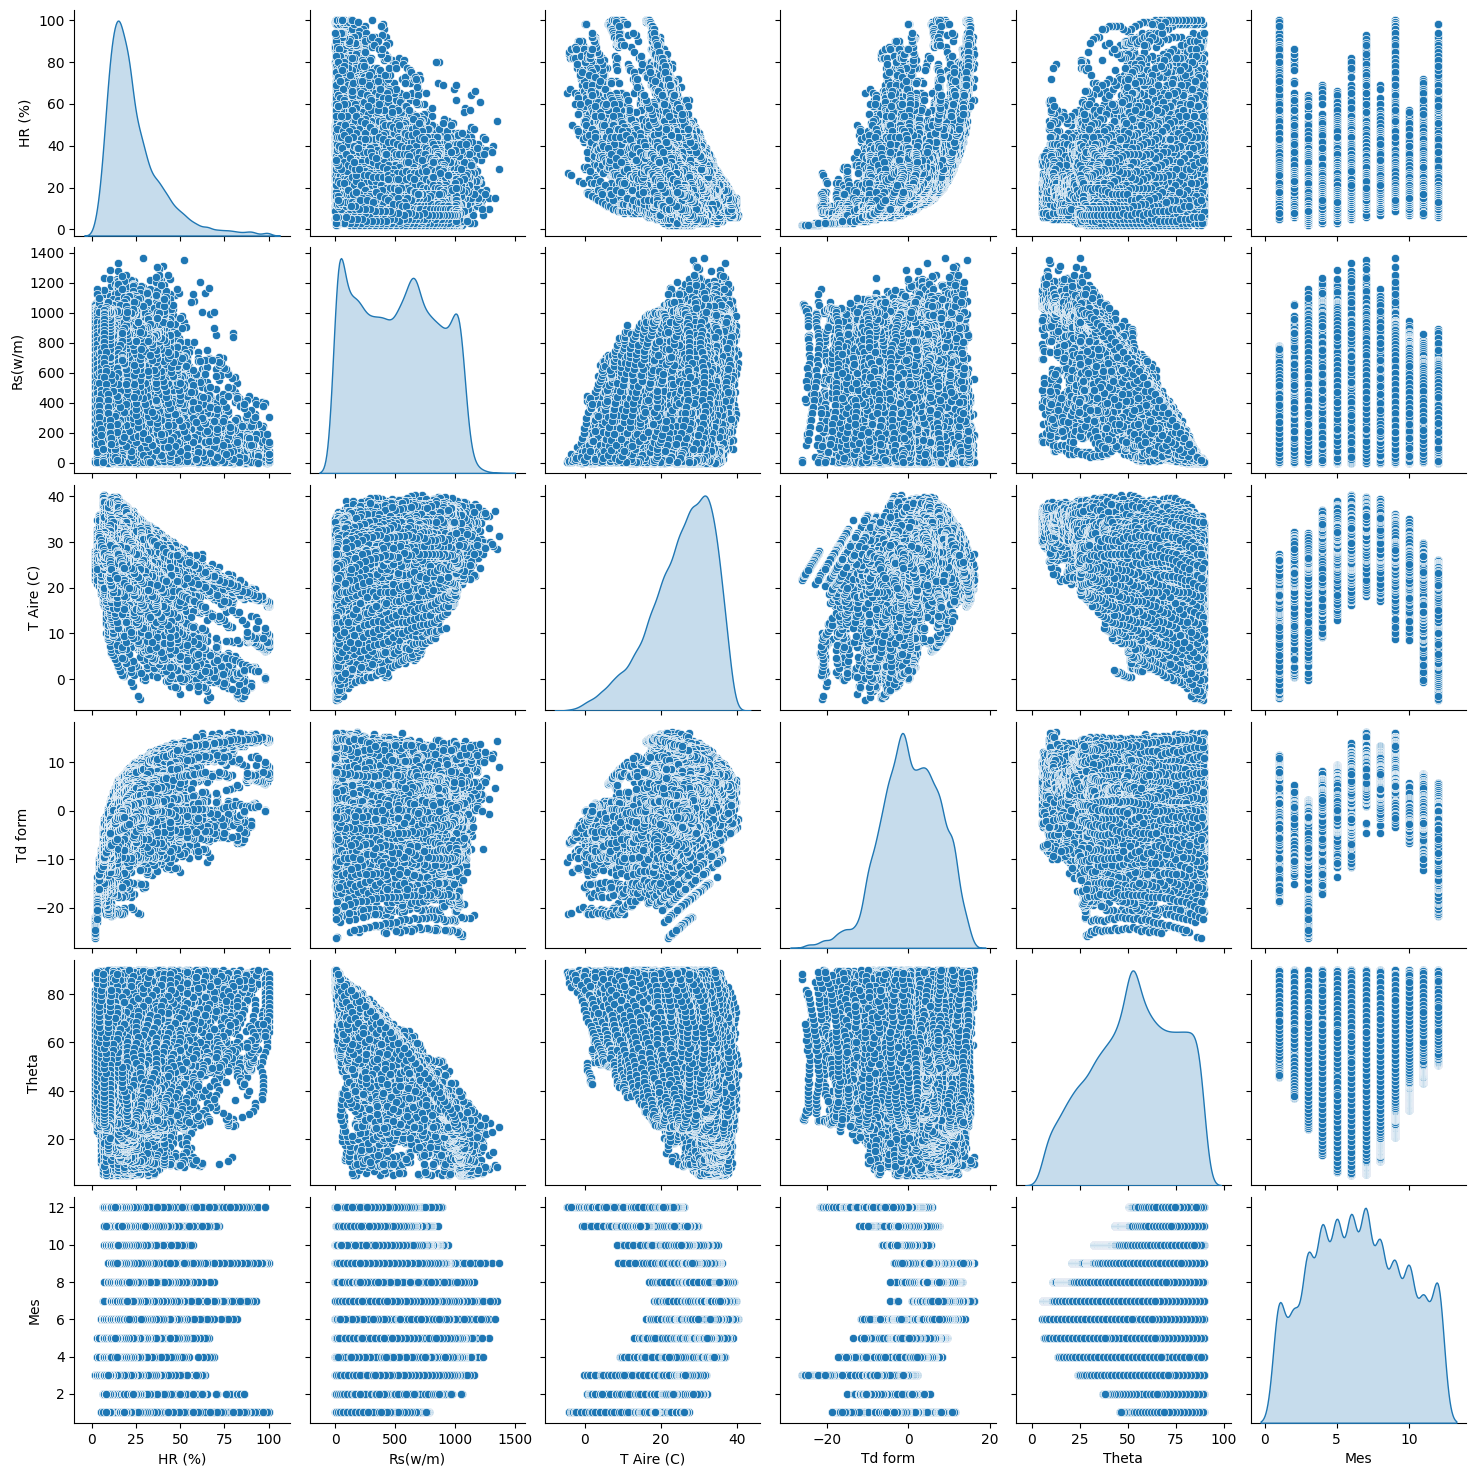

In [18]:
# Cuidado, esta línea es muy pesada, puedes saltartela.
# del cols[-1]
plt.figure(figsize=(10, 10))
sns.pairplot(df.loc[:, cols], diag_kind="kde")

<Figure size 1000x1500 with 0 Axes>

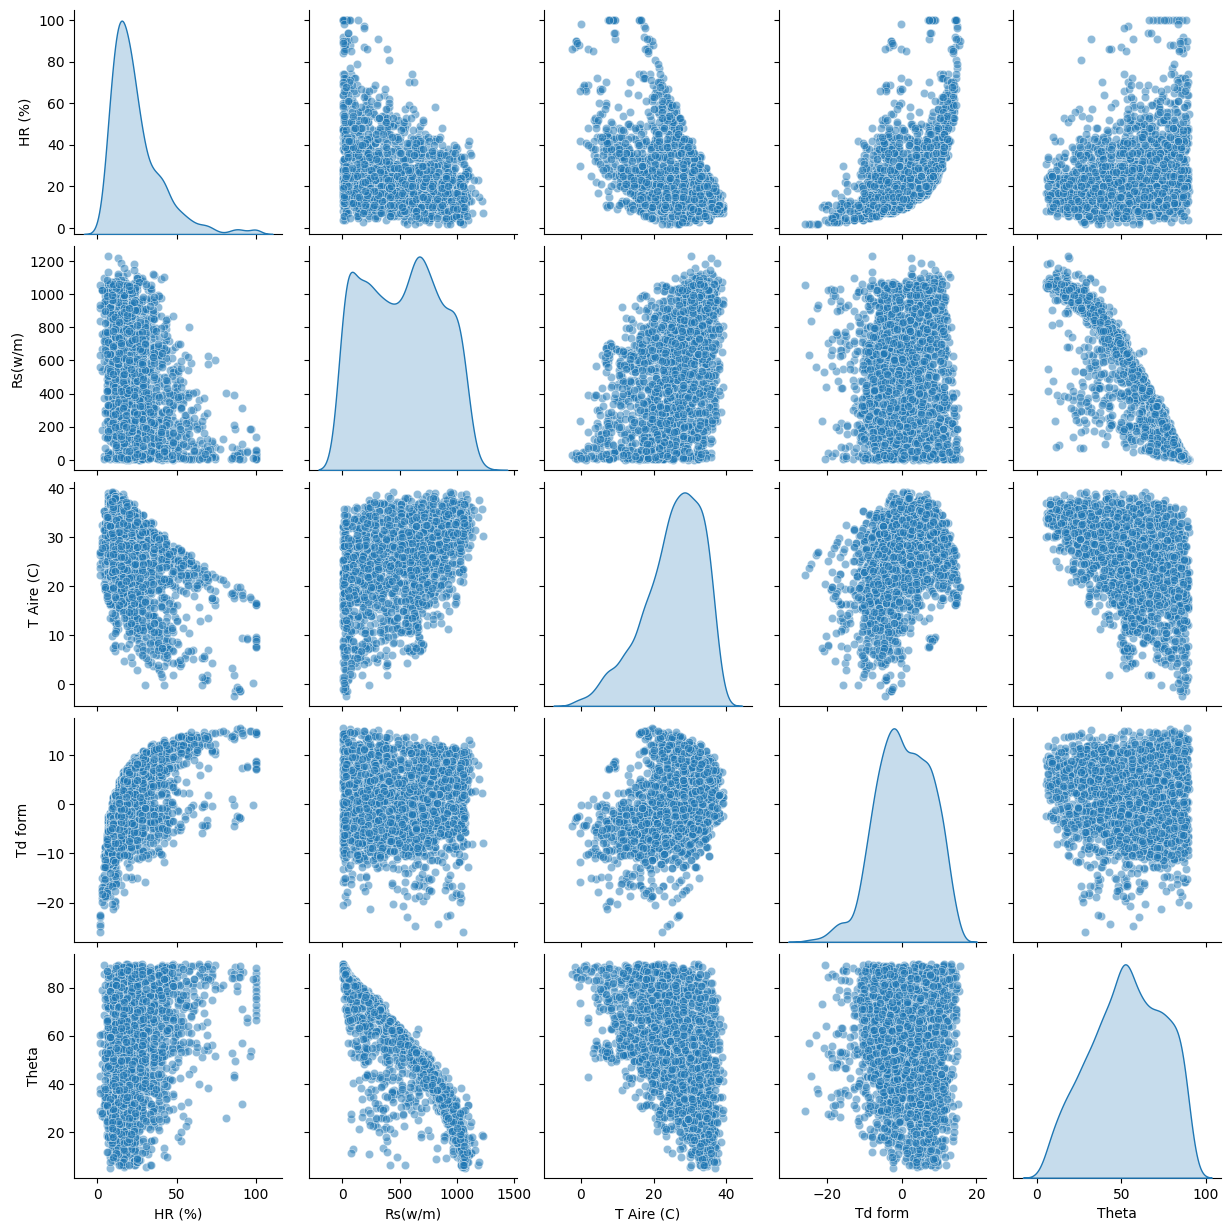

In [19]:
sample = df.loc[:, "HR (%)":].sample(frac=0.1, random_state=614) # frac=0.1 -> Queremos el 10%

plt.figure(figsize=(10, 15))
sns.pairplot(sample, diag_kind="kde", plot_kws={"alpha": 0.5})
plt.show()

In [20]:
norm_df = df.copy()
del norm_df["Dia"], norm_df["Semana"]
norm_df.head()

Timestamp  Year  Mes  HR (%)  Rs(w/m)  T Aire (C)   Td form  \
0 2020-04-01 13:00:00  2020    4      22      4.0        15.8 -5.337960   
1 2020-04-01 13:10:00  2020    4      23     17.0        15.8 -4.812238   
2 2020-04-01 13:20:00  2020    4      23     34.0        16.6 -4.187424   
3 2020-04-01 13:30:00  2020    4      26     47.0        17.0 -2.415345   
4 2020-04-01 13:40:00  2020    4      27     49.0        17.1 -1.884415   

       Theta  
0  89.396630  
1  87.208510  
2  85.017212  
3  82.823682  
4  80.628862

In [21]:
# Normalización Min Max sobre columnas con distribución no normal
norm_cols = ["Rs(w/m)"]
scalerNorm = MinMaxScaler()
norm_df[norm_cols] = scalerNorm.fit_transform(norm_df[norm_cols])

# Estandarizar aquellas con distribución normal.
std_cols = ['HR (%)', 'T Aire (C)', 'Td form', 'Theta']
scalerStd = StandardScaler()
norm_df[std_cols] = scalerStd.fit_transform(norm_df[std_cols])

norm_df.head()

Timestamp  Year  Mes    HR (%)   Rs(w/m)  T Aire (C)   Td form  \
0 2020-04-01 13:00:00  2020    4 -0.125609  0.002196   -1.167043 -0.805672   
1 2020-04-01 13:10:00  2020    4 -0.062355  0.011713   -1.167043 -0.731814   
2 2020-04-01 13:20:00  2020    4 -0.062355  0.024158   -1.069714 -0.644035   
3 2020-04-01 13:30:00  2020    4  0.127408  0.033675   -1.021050 -0.395078   
4 2020-04-01 13:40:00  2020    4  0.190662  0.035139   -1.008884 -0.320489   

      Theta  
0  1.679868  
1  1.577984  
2  1.475952  
3  1.373816  
4  1.271620

In [22]:
norm_df.describe()

Timestamp          Year           Mes  \
count                          22576  22576.000000  22576.000000   
mean   2020-09-14 09:46:58.612685824   2020.203225      6.509878   
min              2020-04-01 13:00:00   2020.000000      1.000000   
25%              2020-06-16 13:17:30   2020.000000      4.000000   
50%              2020-08-31 17:55:00   2020.000000      6.000000   
75%              2020-12-12 19:52:30   2020.000000      9.000000   
max              2021-04-01 01:10:00   2021.000000     12.000000   
std                              NaN      0.402407      3.181451   

             HR (%)       Rs(w/m)    T Aire (C)       Td form         Theta  
count  2.257600e+04  22576.000000  2.257600e+04  2.257600e+04  2.257600e+04  
mean   9.064330e-17      0.376183 -2.417155e-16  4.028591e-17 -1.007148e-17  
min   -1.390692e+00      0.000000 -3.648927e+00 -3.731509e+00 -2.235422e+00  
25%   -6.948962e-01      0.158858 -6.074024e-01 -6.706434e-01 -7.351067e-01  
50%   -2.521172e-01      0.381772  1.712281e-01 -4.715308e-03  3.118546e-02  
75%    3.804243e-01      0.574671  7.795331e-01  7.564860e-01  8.180872e-01  
max    4.808215e+00      1.000000  1.813652e+00  2.201326e+00  1.703752e+00  
std    1.000022e+00      0.240233  1.000022e+00  1.000022e+00  1.000022e+00

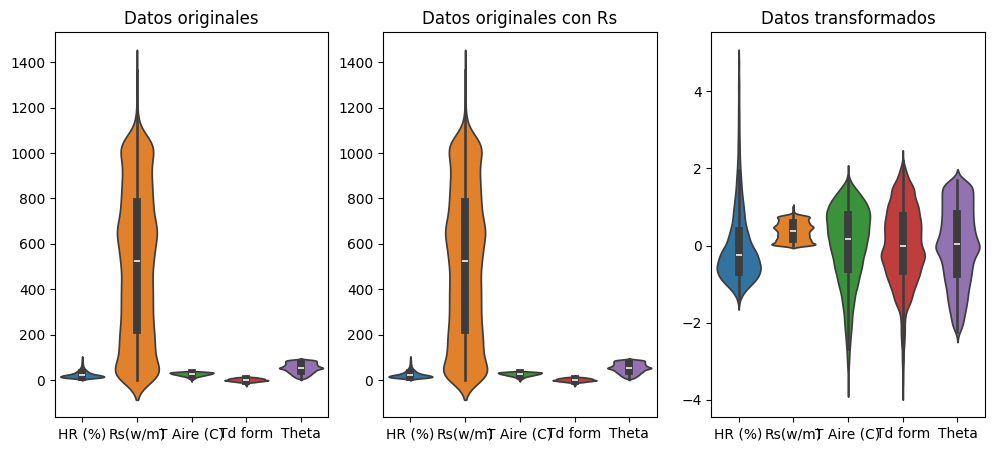

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

ax[0].set_title("Datos originales")
sns.violinplot(df.loc[:, "HR (%)":"Theta"], ax=ax[0])

ax[1].set_title("Datos originales con Rs")
sns.violinplot(df.loc[:, "HR (%)":], ax=ax[1])

ax[2].set_title("Datos transformados")
sns.violinplot(norm_df.loc[:, "HR (%)":], ax=ax[2])

plt.show()

<Figure size 1000x1500 with 0 Axes>

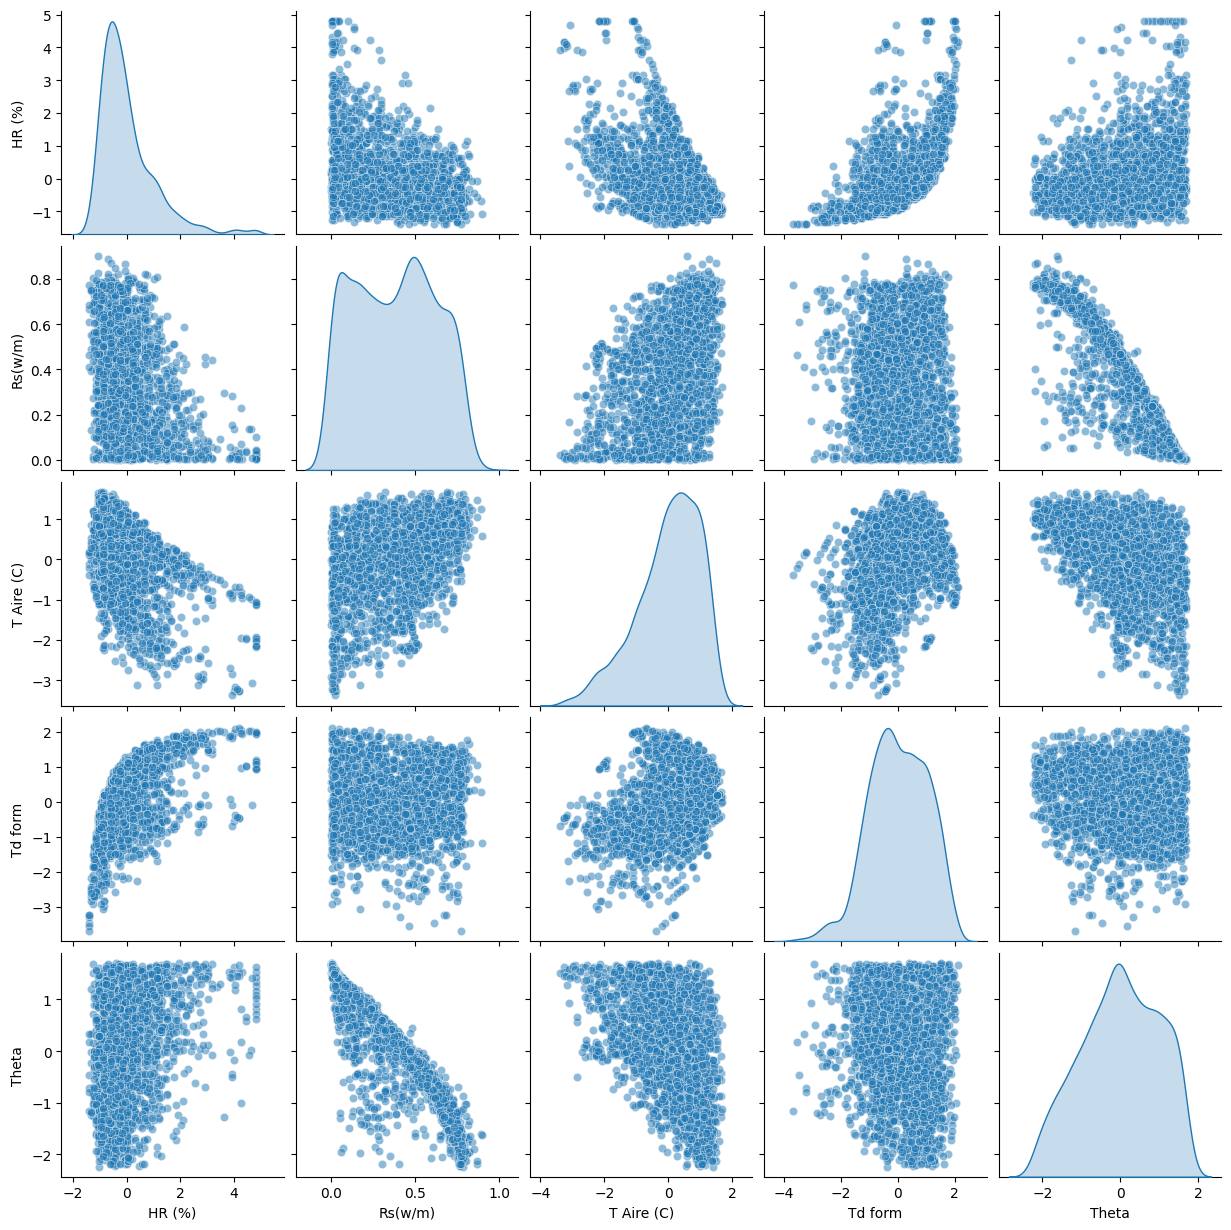

In [24]:
sample = norm_df.loc[:, "HR (%)":].sample(frac=0.1, random_state=614) # frac=0.1 -> Queremos el 10%

plt.figure(figsize=(10, 15))
sns.pairplot(sample, diag_kind="kde", plot_kws={"alpha": 0.5})
plt.show()